In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
print('Drive Mounted')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Drive Mounted


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import adam
from keras.models import Model
from keras.layers import merge,core
from keras.engine.topology import Input
from keras.layers.normalization import BatchNormalization

from subprocess import check_output
print(check_output(["ls", "drive/My Drive/FashionMnist"]).decode("utf8"))
K.set_image_dim_ordering('th')

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [0]:
train = pd.read_csv("drive/My Drive/FashionMnist/fashion-mnist_train.csv").values
test  = pd.read_csv("drive/My Drive/FashionMnist/fashion-mnist_test.csv").values

In [0]:
# Reshape and normalize training data
trainX = train[:, 1:].reshape(train.shape[0],1,28, 28).astype( 'float32' )

X_train1=trainX/255.0
X_train=X_train1[:,:,:,:]
y_train=train[:,0]


print("Xtrain.shape",X_train.shape)
print("ytrain.shape",y_train.shape)


# Reshape and normalize test data
testX = test[:,1:].reshape(test.shape[0],1, 28, 28).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:,0]
print("Xtest.shape",X_test.shape)
print("ytest.shape",y_test.shape)

Xtrain.shape (60000, 1, 28, 28)
ytrain.shape (60000,)
Xtest.shape (10000, 1, 28, 28)
ytest.shape (10000,)


In [0]:
#One-Hot Encoding the Label to Output
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [0]:
model = Sequential()

#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

model.add(Convolution2D(16, (3,3), border_mode='valid',input_shape=(1,28,28))) #1st
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(Convolution2D(16, (3, 3))) # 2nd
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3,3),border_mode='valid')) #1st
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(Convolution2D(32, (3, 3))) # 2nd
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

"""model.add(Convolution2D(64, (3,3), data_format='channels_first')) #3rd
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(Convolution2D(64, (3,3), data_format='channels_first')) #4th
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))
          
model.add(Convolution2D(128, (3,3),data_format='channels_first')) #5th
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(Convolution2D(128, (3, 3),data_format='channels_first')) #6th
model.add(Activation('relu'))
model.add(BatchNormalization(axis=2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))"""



model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(1, 28, 28..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 26, 26)        160       
_________________________________________________________________
activation_8 (Activation)    (None, 16, 26, 26)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 26, 26)        104       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 24, 24)        2320      
_________________________________________________________________
activation_9 (Activation)    (None, 16, 24, 24)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 24, 24)        96        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 12, 12)        0         
__________

In [0]:
from keras import callbacks
checkpointer = callbacks.ModelCheckpoint(filepath='drive/My Drive/COLAB Programs/fashionMNIST/_best_weights.h5', verbose=1, monitor='loss', mode='auto', save_best_only=True)
model.fit(X_train, y_train,
          epochs=20,
          verbose=1, callbacks=[checkpointer])
score = model.evaluate(X_test, y_test, batch_size=128)
print("Score",score)
model.save("drive/My Drive/COLAB Programs/fashionMNIST/model.hdf5")


Epoch 1/20
60000/60000 [==============================] - 38s 635us/step - loss: 0.5335 - acc: 0.8066

Epoch 00001: loss improved from inf to 0.53351, saving model to _best_weights.h5
Epoch 2/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.3501 - acc: 0.8726

Epoch 00002: loss improved from 0.53351 to 0.35009, saving model to _best_weights.h5
Epoch 3/20
60000/60000 [==============================] - 36s 602us/step - loss: 0.3013 - acc: 0.8910

Epoch 00003: loss improved from 0.35009 to 0.30126, saving model to _best_weights.h5
Epoch 4/20
60000/60000 [==============================] - 36s 604us/step - loss: 0.2742 - acc: 0.9014

Epoch 00004: loss improved from 0.30126 to 0.27420, saving model to _best_weights.h5
Epoch 5/20
60000/60000 [==============================] - 36s 606us/step - loss: 0.2509 - acc: 0.9098

Epoch 00005: loss improved from 0.27420 to 0.25087, saving model to _best_weights.h5
Epoch 6/20
60000/60000 [==============================] - 37s 60

In [0]:
from PIL import Image
import cv2
from numpy import genfromtxt

temp=X_test[53][0]

im=Image.fromarray(temp)
im= np.expand_dims(im, axis=0)
im= np.expand_dims(im, axis=0)

s=model.predict_classes(im)
print("Predict_Classes",model.predict_classes(im))
print("Predict: ",model.predict(im))

Predict_Classes [3]
Predict:  [[1.0531291e-02 2.4761271e-06 2.3721055e-05 9.8785257e-01 5.2752435e-05
  4.5150207e-07 1.3730986e-03 3.4634806e-07 1.6323850e-04 1.2874695e-07]]


Y_pred [[9.99e-01 1.65e-08 5.31e-04 ... 4.11e-12 7.53e-07 1.90e-13]
 [7.23e-18 1.00e+00 2.70e-18 ... 0.00e+00 1.02e-16 2.80e-34]
 [7.02e-03 2.95e-09 9.55e-01 ... 9.73e-12 8.52e-07 1.92e-11]
 ...
 [6.19e-12 7.86e-20 2.32e-15 ... 2.19e-24 1.00e+00 1.90e-25]
 [7.01e-07 2.32e-09 2.84e-09 ... 1.66e-14 1.00e+00 4.13e-15]
 [2.38e-09 1.00e+00 3.99e-09 ... 3.18e-19 2.09e-09 3.40e-18]]
y_pred classes:  [0 1 2 ... 8 8 1]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1000
           1       0.99      1.00      0.99      1000
           2       0.92      0.88      0.90      1000
           3       0.94      0.94      0.94      1000
           4       0.88      0.94      0.91      1000
           5       0.99      0.98      0.99      1000
           6       0.83      0.78      0.80      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.98      0.98  

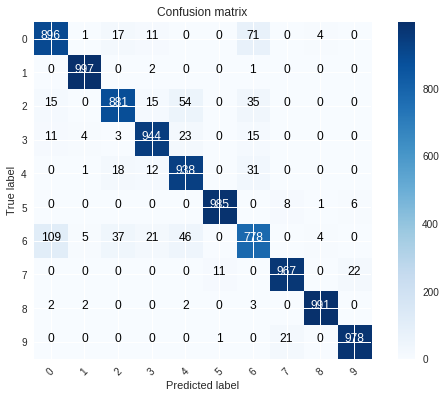

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print("#################################")
#print("Y_pred",Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print("y_pred",y_pred)
#print("#################################")
y_pred = model.predict_classes(X_test)
#print("y_pred classes: ",y_pred)
target_names = ['0','1','2','3','4','5','6','7','8','9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("8--Normalized confusion matrix")
    else:
        print('8--Confusion matrix, without normalization')

    print("9",cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()
